In [1]:
import pandas as pd
import matplotlib as plt
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

In [2]:
data = "cardio_train.csv"
cardio_df = pd.read_csv(data, delimiter = ';')
cardio_df.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
cardio1_df= cardio_df.drop(['id'],axis=1)
# cardio1_df.active[cardio1_df.active == 1] = "True"
# cardio1_df.active[cardio1_df.active == 0] = "False"
age_upd = cardio1_df['age'].div(365)
rounded_age = round(age_upd)
cardio1_df.update(rounded_age)
cardio1_df.head()
#cardio_df["age"].value_counts()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
cardio_1 = cardio1_df.groupby(["cardio"]).get_group(1)
cardio_1.head()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
7,62.0,2,178,95.0,130,90,3,3,0,0,1,1
15,46.0,2,172,112.0,120,80,1,1,0,0,0,1


In [5]:
cardio_0 = cardio1_df.groupby(["cardio"]).get_group(0)
cardio_0.head()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0
5,60.0,1,151,67.0,120,80,2,2,0,0,0,0
6,61.0,1,157,93.0,130,80,3,1,0,0,1,0
8,48.0,1,158,71.0,110,70,1,1,0,0,1,0


In [6]:
# T test of weight for both group (with heart attack and without heart attack)
stats.ttest_ind(cardio_0['weight'], cardio_1['weight'], equal_var=False)

Ttest_indResult(statistic=-48.87170312417719, pvalue=0.0)

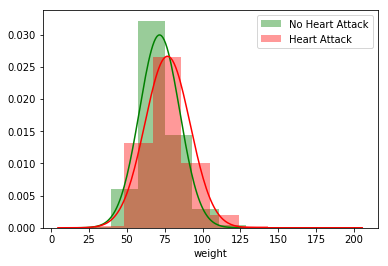

In [7]:
# Plot weight without heat attack (cardio_0) and with heart attack (cardio_1)
sns.distplot(cardio_0["weight"], bins=10, fit=stats.norm, kde=False, label = "No Heart Attack", color = "g", fit_kws ={"color":"green"})
sns.distplot(cardio_1["weight"], bins=10, fit=stats.norm, kde=False, label = "Heart Attack", color = "r", fit_kws ={"color":"red"})
plt.legend()
plt.show()


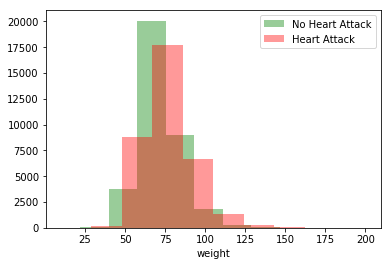

In [8]:
# Plot weight without heat attack (cardio_0) and with heart attack (cardio_1) not fit
sns.distplot(cardio_0["weight"], bins=10, kde=False, label = "No Heart Attack", color = "g", fit_kws ={"color":"green"})
sns.distplot(cardio_1["weight"], bins=10, kde=False, label = "Heart Attack", color = "r", fit_kws ={"color":"red"})
plt.legend()
plt.show()

In [9]:
# Observed alcohol level (with heart attack)
alcoholic_attack = len(cardio_1[cardio_1["alco"] == 1 ])
print(alcoholic_attack)
nonealcoholic_attack = len(cardio_1[cardio_1["alco"] == 0 ])
print(nonealcoholic_attack)

1823
33156


In [10]:
#create dataframe for observed alcohol level(with heart attack)
observed_alcohol=pd.Series([alcoholic_attack, nonealcoholic_attack],index = ['Consume alcohol', 'Do not consume alcohol'])
observed_alcohol

Consume alcohol            1823
Do not consume alcohol    33156
dtype: int64

In [11]:
# Expected alcohol level (without heart attack)
alcoholic_no_attack = len(cardio_0[cardio_0["alco"] == 1 ])
print(alcoholic_no_attack)
nonealcoholic_no_attack = len(cardio_0[cardio_0["alco"] == 0 ])
print(nonealcoholic_no_attack)

1941
33080


In [12]:
#create dataframe for expected alcohol level (without heart attack)
expected_alcohol=pd.Series([alcoholic_no_attack, nonealcoholic_no_attack],index = ['Consume alcohol', 'Do not consume alcohol'])
expected_alcohol

Consume alcohol            1941
Do not consume alcohol    33080
dtype: int64

In [13]:
# create dataframe for both expected (without heart attack) and observed (with heart attack)
df = pd.DataFrame([observed_alcohol,expected_alcohol]).T
df.columns = ["Observed alcohol","Expected alcohol"]
df

,Observed alcohol,Expected alcohol
Consume alcohol,1823,1941
Do not consume alcohol,33156,33080


In [14]:
# The degree of freedom is 3-1 = 2
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.
critical_value = stats.chi2.ppf(q = 0.95, df = 2)
critical_value

5.991464547107979

In [15]:
# Run the chi square test with stats.chisquare()
stats.chisquare(df['Observed alcohol'], df['Expected alcohol'])

Power_divergenceResult(statistic=7.348228857711186, pvalue=0.006712885678600141)